In [1]:
# Compare Qsm from different output
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import gsw

In [2]:
def IFA(file,Hs):
    # Grid areas
    Area = np.empty([50, 9])
    Area[:10,:] = 100
    Area[10:20,:] = 200
    Area[20:30,:] = 300
    Area[30:40,:] = 800
    Area[40:,:] = 1600
    
    t0 = 24
    tn = 161
    state = file.isel(Y=range(30,39), T=range(t0,tn))
    MR = state.icefrntA.isel(X=1).data.mean(0) # Melt rate at the icefront
    Qsm = (MR*Area).sum()/(24*3600)
    return Qsm

In [3]:
Hs = np.array([9, 12, 15, 18, 30, 150])
hsr = Hs / 150

Qsm1 = np.empty(len(Hs))
Qsm2 = np.empty(len(Hs))

for i in range(len(Hs)):
    file1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/strat_qf700/icefrntA_' + str(format(Hs[i],'03d')) + '.nc')
    file2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf700/icefrntA_' + str(format(Hs[i],'03d')) + '.nc')
    Qsm1[i] = IFA(file1,Hs[i])
    Qsm2[i] = IFA(file2,Hs[i])

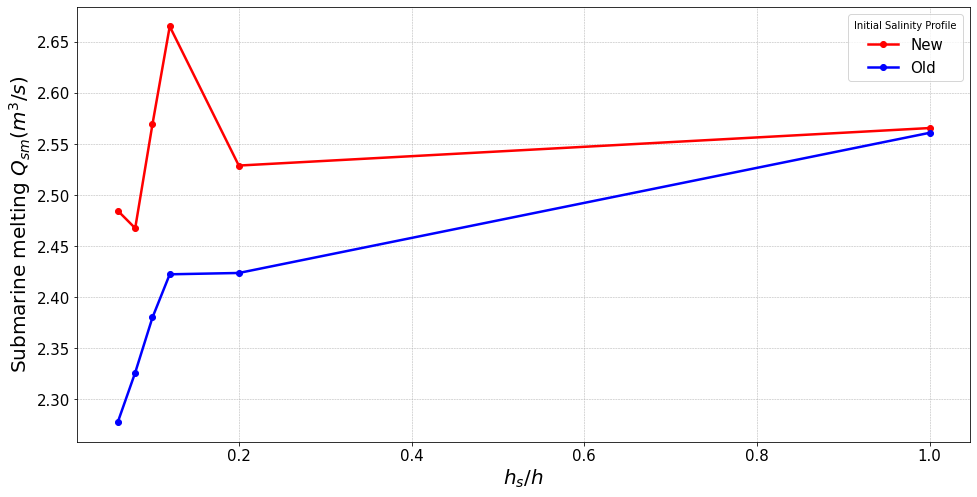

In [4]:
fig1,ax = plt.subplots(figsize=(16,8))

ax.plot(hsr,Qsm1,'o-r',lw=2.5,label='New')
ax.plot(hsr,Qsm2,'o-b',lw=2.5,label='Old')

ax.legend(loc='best', fontsize=15, title=r'Initial Salinity Profile')
ax.set_ylabel(r'Submarine melting $Q_{sm}(m^3/s)$',size=20)
ax.set_xlabel(r'$h_s/h$', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.grid(linestyle='--', linewidth='0.5')


In [5]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/Comp_Qsm/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/Qsm.png', dpi=200, bbox_inches='tight')